# Inputting Data

In [ ]:
from keras.models import load_model

In [1]:
import struct
import numpy as np
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras.utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from keras_tqdm import TQDMNotebookCallback

#load mnist dataset
(x, y), (x_test, y_test) = mnist.load_data()
        
nums = range(0,10)

plt.hist(y, bins = 10)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.show()

Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

# Scaling & Prepping 

We will work from copies of the data we loaded

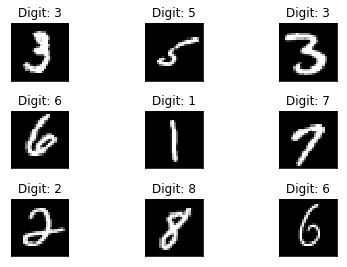

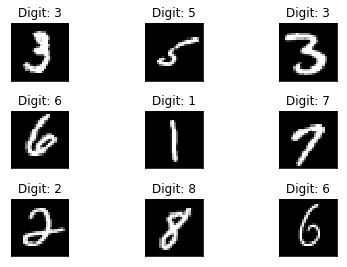

In [2]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x[i + 10], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y[i + 10]))
  plt.xticks([])
  plt.yticks([])
  
fig

We need to scale the data from 0 to 1 to improve training times (decreases the rate of finding local minima)

In [3]:
x = x.astype('float')/255
x_test = x_test.astype('float')/255

In [4]:
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 15

if keras.backend.image_data_format() == 'channels_first':
    x = x.reshape(x.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x = x.reshape(x.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


    




Our result is a categorical value, so we need to convert our labeled data as such. The np_utils.to_categorical function requires entries from 0 to n-1, so we will subtract 1 from our labels before passing them in.

In [5]:
y = keras.utils.to_categorical(y, 10)
y_test = keras.utils.to_categorical(y_test, 10)


Currently, we have 124,800 entries of 28x28 matrices. 
Each matrix is an image of a letter, with normalized values of each pixel between 0 and 1

In [6]:

print(x.shape)

(60000, 28, 28, 1)


# Building the Model


We will be using a linear stack of layers, aka the sequential model in keras

In [7]:
model = Sequential()


We flatten the inputs to 1D, since we currently have the 28x28 matrix for each entry. Flattening the 2D is done for the fully connected layer of the CNN. This layer expects a feature input vector, just like any other classifier.

In [8]:

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
# Calling dropout allows us to prevent overfitting. This method is a regularization technique that sets a probability of eliminating nodes in the network. In essence, we are spreading and shrinking the weights of the net
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

#The final layer needs a dimension of 26, as we are trying to classify the input as one of 26 letters in the alphabet
model.add(Dense(10, activation='softmax'))

model.compile(loss = categorical_crossentropy, optimizer = Adadelta(), metrics = ["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4719104   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [13]:
history = model.fit(x, y,
          batch_size=batch_size,
          epochs=10,
          verbose=0,
          callbacks=[TQDMNotebookCallback()])

score = model.evaluate(x_test, y_test, verbose=0)


Accuracy on test set:  0.9924


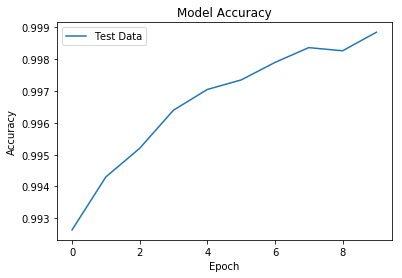

In [15]:
print("Accuracy on test set: ", score[1])

plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test Data'], loc='upper left')
plt.show()

In [ ]:
print(history)

model.save('MNIST_Numeric_predictor.h5')